In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import os

import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

from typing import List

import shutil

/Users/shogun/.pyenv/versions/3.10.6/envs/inspiart/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Download the database (table part)

In [2]:
# Set the path to the file you'd like to load
file_path = "wikiart_art_pieces.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "simolopes/wikiart-all-artpieces",
  file_path
)

df.head()

/var/folders/1r/626773hx3mbf2w_31tdjwv6m0000gn/T/ipykernel_70355/4128968621.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


artist                         style               genre  \
0  Byzantine Mosaics  Early Byzantine (c. 330–750)  religious painting   
1  Byzantine Mosaics  Early Byzantine (c. 330–750)  religious painting   
2  Byzantine Mosaics  Early Byzantine (c. 330–750)  religious painting   
3  Byzantine Mosaics  Early Byzantine (c. 330–750)  religious painting   
4  Byzantine Mosaics  Early Byzantine (c. 330–750)  religious painting   

        movement                                               tags  \
0  Byzantine Art  ['Holyplaces', 'Byzantinearchitecture', 'Arch'...   
1  Byzantine Art    ['Holyplaces', 'Byzantinearchitecture', 'Arch']   
2  Byzantine Art                             ['Prophet', 'History']   
3  Byzantine Art                          ['Holyplaces', 'Prophet']   
4  Byzantine Art                          ['Holyplaces', 'Prophet']   

                                                 url  \
0  https://www.wikiart.org/en/byzantine-mosaics/e...   
1  https://www.wikiart.org/en/byzantine-mosaics/e...   
2  https://www.wikiart.org/en/byzantine-mosaics/e...   
3  https://www.wikiart.org/en/byzantine-mosaics/e...   
4  https://www.wikiart.org/en/byzantine-mosaics/e...   

                                                 img  \
0  https://uploads2.wikiart.org/00211/images/byza...   
1  https://uploads2.wikiart.org/00211/images/byza...   
2  https://uploads2.wikiart.org/00211/images/byza...   
3  https://uploads2.wikiart.org/00211/images/byza...   
4  https://uploads2.wikiart.org/00211/images/byza...   

                                  file_name  
0  0-ravenna-cappella-arcivescovile-166.jpg  
1  1-ravenna-cappella-arcivescovile-167.jpg  
2  2-ravenna-cappella-arcivescovile-168.jpg  
3  3-ravenna-cappella-arcivescovile-169.jpg  
4  4-ravenna-cappella-arcivescovile-171.jpg

In [3]:
# Set the path to the file you'd like to load
file_path = "classes.csv"

# Load the latest version
df_33k = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "steubk/wikiart",
  file_path
)

df_33k.head()

/var/folders/1r/626773hx3mbf2w_31tdjwv6m0000gn/T/ipykernel_70355/2740059946.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_33k = kagglehub.load_dataset(


filename         artist  \
0  Abstract_Expressionism/aaron-siskind_acolman-1...  aaron siskind   
1  Abstract_Expressionism/aaron-siskind_chicago-6...  aaron siskind   
2  Abstract_Expressionism/aaron-siskind_glouceste...  aaron siskind   
3  Abstract_Expressionism/aaron-siskind_jerome-ar...  aaron siskind   
4  Abstract_Expressionism/aaron-siskind_kentucky-...  aaron siskind   

                        genre          description             phash  width  \
0  ['Abstract Expressionism']       acolman-1-1955  bebbeb018a7d80a8   1922   
1  ['Abstract Expressionism']       chicago-6-1961  d7d0781be51fc00e   1382   
2  ['Abstract Expressionism']  gloucester-16a-1944  9f846e5a6c639325   1382   
3  ['Abstract Expressionism']  jerome-arizona-1949  a5d691f85ac5e4d0   1382   
4  ['Abstract Expressionism']      kentucky-4-1951  880df359e6b11db1   1382   

   height  genre_count subset  
0    1382            1  train  
1    1746            1  train  
2    1857            1  train  
3    1849            1  train  
4    1625            1  train

In [4]:
df_33k['image_name'] = df_33k['filename'].apply(lambda x: x.rsplit("/")[1])

In [5]:
df_33k.head()

filename         artist  \
0  Abstract_Expressionism/aaron-siskind_acolman-1...  aaron siskind   
1  Abstract_Expressionism/aaron-siskind_chicago-6...  aaron siskind   
2  Abstract_Expressionism/aaron-siskind_glouceste...  aaron siskind   
3  Abstract_Expressionism/aaron-siskind_jerome-ar...  aaron siskind   
4  Abstract_Expressionism/aaron-siskind_kentucky-...  aaron siskind   

                        genre          description             phash  width  \
0  ['Abstract Expressionism']       acolman-1-1955  bebbeb018a7d80a8   1922   
1  ['Abstract Expressionism']       chicago-6-1961  d7d0781be51fc00e   1382   
2  ['Abstract Expressionism']  gloucester-16a-1944  9f846e5a6c639325   1382   
3  ['Abstract Expressionism']  jerome-arizona-1949  a5d691f85ac5e4d0   1382   
4  ['Abstract Expressionism']      kentucky-4-1951  880df359e6b11db1   1382   

   height  genre_count subset                             image_name  
0    1382            1  train       aaron-siskind_acolman-1-1955.jpg  
1    1746            1  train       aaron-siskind_chicago-6-1961.jpg  
2    1857            1  train  aaron-siskind_gloucester-16a-1944.jpg  
3    1849            1  train  aaron-siskind_jerome-arizona-1949.jpg  
4    1625            1  train      aaron-siskind_kentucky-4-1951.jpg

In [6]:
df.shape

(176436, 8)

In [7]:
df_33k.shape

(80042, 10)

# Display an image 

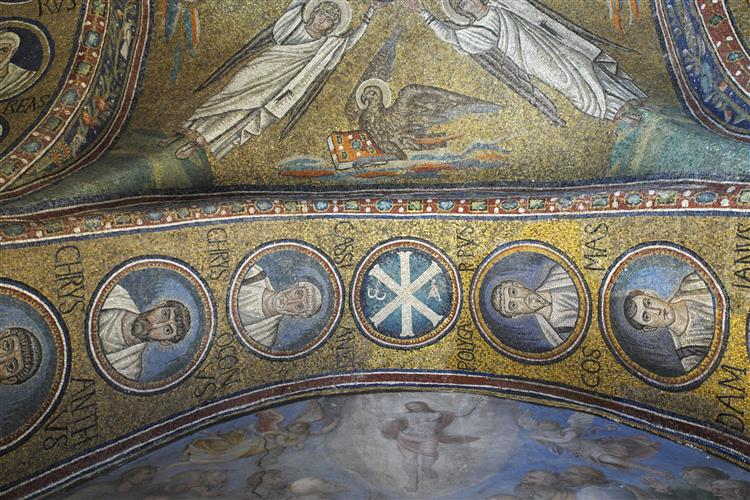

In [8]:
# Récupérer l'URL de la première image
url = df['img'][1]

# Télécharger l'image
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Afficher directement dans le notebook
display(img)

# Exploring the database

In [9]:
df_grouped = df.groupby(['artist', 'style', 'genre', 'movement']).count().drop(columns=['tags', 'url', 'file_name'])
df_grouped

img
artist        style                genre                             movement               
3D            Street art           graffiti                          Street art            5
                                   symbolic painting                 Street art            5
A.Y. Jackson  Art Nouveau (Modern) landscape                         Art Nouveau          18
              Post-Impressionism   landscape                         Art Nouveau           9
              Symbolism            landscape                         Art Nouveau           4
...                                                                                      ...
Émilie Charmy Fauvism              portrait                          Post-Impressionism    2
                                   still life                        Post-Impressionism    1
              Post-Impressionism   nude painting (nu),genre painting Post-Impressionism    1
                                   portrait                          Post-Impressionism    1
                                   portrait,genre painting           Post-Impressionism    1

[26869 rows x 1 columns]

### Artists 

In [10]:
df_artist_movement = df.groupby(['artist', 'movement']).count().drop(columns=['tags', 'url', 'file_name', 'style', 'genre'])
df_artist_movement

img
artist                 movement                                    
3D                     Street art                                10
A.Y. Jackson           Art Nouveau                               31
Aaron Douglas          Harlem Renaissance (New Negro Movement)   17
Aaron Siskind          Abstract Expressionism                    23
Abbas Kiarostami       Contemporary                              44
...                                                             ...
Édouard De Bièfve      Romanticism                                3
Émile Bayard           Academic Art                              58
Émile Friant           Realism                                   63
Émile Prisse d'Avennes Romanticism                               12
Émilie Charmy          Post-Impressionism                        39

[3210 rows x 1 columns]

In [11]:
df_artist_nb_movements = df.groupby('artist')['movement'].nunique()
df_artist_nb_movements

artist
3D                        1
A.Y. Jackson              1
Aaron Douglas             1
Aaron Siskind             1
Abbas Kiarostami          1
                         ..
Édouard De Bièfve         1
Émile Bayard              1
Émile Friant              1
Émile Prisse d'Avennes    1
Émilie Charmy             1
Name: movement, Length: 3209, dtype: int64

===> Each artist is associated to a movement 

### Genres and styles 

In [12]:
#print all different genres in the database
genres = df['genre'].unique()
genres

array(['religious painting', 'ornament', 'animal painting',
       'mythological painting', 'no genre', 'portrait', 'landscape',
       'portrait,religious painting', 'religious painting,portrait',
       'icon', 'icon,mosaic', 'icon,sculpture', 'icon,miniature',
       'icon,portrait', 'icon,religious painting', 'miniature',
       'religious painting,icon', 'architecture',
       'sculpture,architecture', 'genre painting',
       'battle painting,history painting', 'illustration', 'cityscape',
       'allegorical painting', 'sketch and study',
       'religious painting,miniature', 'jewelry', 'sculpture',
       'miniature,religious painting', 'miniature,portrait',
       'religious painting,illustration', 'design',
       'sculpture,self-portrait', 'battle painting', 'history painting',
       "religious painting,trompe-l'œil", 'self-portrait',
       'religious painting,allegorical painting',
       'genre painting,nude painting (nu)', 'nude painting (nu)',
       'portrait,genre p

In [13]:
#print all different styles in the database
styles = df['style'].unique()
styles

array(['Early Byzantine (c. 330–750)', 'Byzantine',
       'Macedonian Renaissance (867–1056)',
       'Middle Byzantine (c. 850–1204)', 'Komnenian style (1081-1185)',
       'Late Byzantine/Palaeologan Renaissance (c. 1261–1453)',
       'Coptic art', 'Unknown', 'Romanesque',
       'Kyiv school of icon painting', 'Novgorod school of icon painting',
       'Crusader workshop', 'Vladimir school of icon painting',
       'Yaroslavl school of icon painting', 'Galicia-Volyn school',
       'Latin Empire of Constantinople (1204-1261)',
       'Vologda school of icon painting',
       'Moscow school of icon painting', 'Pskov school of icon painting',
       'Cretan school of icon painting',
       'Macedonian school of icon painting',
       'Stroganov school of icon painting',
       'Chernihiv school of icon painting', 'Baroque', 'Mozarabic',
       'Mosan art', 'International Gothic', 'Proto Renaissance', 'Gothic',
       'Early Renaissance', 'Northern Renaissance', 'Viking art',
       

In [14]:
df_genres = df.groupby(['genre', 'style']).count().drop(columns=['tags', 'url', 'file_name', 'artist','movement']).reset_index()
df_genres

genre                   style   img
0                              abstract            Abstract Art  1440
1                              abstract  Abstract Expressionism  3128
2                              abstract             Academicism     1
3                              abstract         Action painting   104
4                              abstract      Analytical Realism     4
...                                 ...                     ...   ...
4208                  wildlife painting                 Realism    15
4209                  wildlife painting             Romanticism    28
4210                  wildlife painting                 Unknown     2
4211  wildlife painting,animal painting             Orientalism     2
4212           wildlife painting,marina               Symbolism     2

[4213 rows x 3 columns]

# Filter the database by styles

Export the styles in CSV ton manually filter the ones we want to keep :

In [15]:
# All unique styles
styles = df['style'].unique()
df_styles = pd.DataFrame(styles, columns=['syle'])

# Exporter en CSV
file_path="styles_uniques.csv"
df_styles.to_csv(file_path, index=False)

Little tool to verify few images of a genre : 

In [16]:
list_styles = list(styles)

In [17]:
i = 0

style = Early Byzantine (c. 330–750)


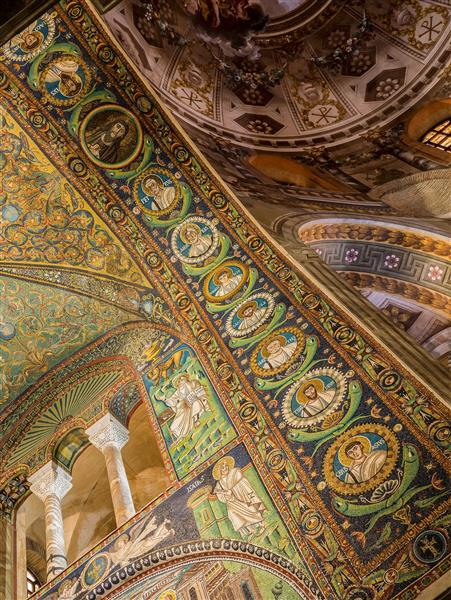

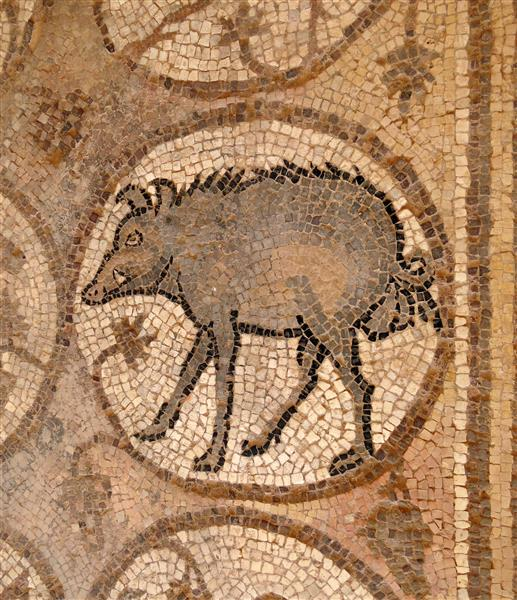

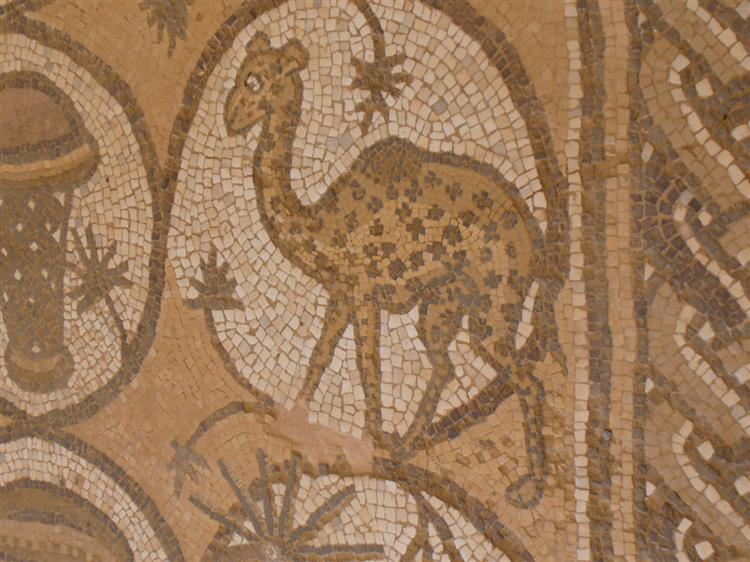

In [18]:
### rerun the cell each time to see the images
import random

style = list_styles[i]

print(f"style = {style}")

df_test = df[df['style']==style]

# Take 3 randomly
df_sample = df_test.sample(min(3, len(df_test)))

# Download and print images
for url in df_sample['img']:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    display(img)

i+=1

Asked ChatGPT to give me the date of all styles to filter art styles that were after 1800. 
In CSV I put 1 if it was after 1800 and 0 if it was before.

In [19]:
file_path="styles_uniques_filed.csv"
styles_filtered = pd.read_csv(file_path, encoding='utf-8', sep=";")
styles_filtered

FileNotFoundError: [Errno 2] No such file or directory: 'styles_uniques_filed.csv'

In [20]:
styles_to_keep = list(styles_filtered[styles_filtered['keep']==1]['genre'])
styles_to_keep

NameError: name 'styles_filtered' is not defined

In [21]:
styles_to_keep = ['Orientalism',
 'Neoclassicism',
 'Naturalism',
 'Romanticism',
 'Academicism',
 'Neo-Rococo',
 'Kitsch',
 'Realism',
 'Impressionism',
 'Expressionism',
 'Japonism',
 'Magic Realism',
 'Symbolism',
 'Costumbrismo',
 'Biedermeier',
 'Luminism',
 'Ink and wash painting',
 'Naïve Art (Primitivism)',
 'Art Nouveau (Modern)',
 'Divisionism',
 'Social Realism',
 'Tonalism',
 'Post-Impressionism',
 'Pointillism',
 'Ukiyo-e',
 'American Realism',
 'Socialist Realism',
 'Fauvism',
 'Cubism',
 'Abstract Art',
 'Precisionism',
 'Figurative Expressionism',
 'Existential Art',
 'Surrealism',
 'New Realism',
 'Neo-baroque',
 'Abstract Expressionism',
 'Neo-Romanticism',
 'Neo-Impressionism',
 'Cloisonnism',
 'Synthetism',
 'Regionalism',
 'Orphism',
 'Art Deco',
 'Neo-Expressionism',
 'Fantasy Art',
 'New Medievialism',
 'Neo-Byzantine',
 'Lyrical Abstraction',
 'New Ink Painting',
 'Verism',
 'Contemporary Realism',
 'Color Field Painting',
 'Art Brut',
 'Outsider art',
 'Cubo-Expressionism',
 'Pop Art',
 'Geometric',
 'Art Singulier',
 'Action painting',
 'Constructivism',
 'Neoplasticism',
 'Intimism',
 'Dada',
 'Analytical Cubism',
 'Synthetic Cubism',
 'Muralism',
 'Futurism',
 'Cubo-Futurism',
 'Tachisme',
 'Modernismo',
 'Metaphysical art',
 'Excessivism',
 'Classical Realism',
 'Severe Style',
 'Miserablism',
 'Art Informel',
 'Neo-Pop Art',
 'Native Art',
 'Transavantgarde',
 'Contemporary',
 'Conceptual Art',
 'Light and Space',
 'Junk Art',
 'Shin-hanga',
 'Hard Edge Painting',
 'Neo-Figurative Art',
 'Purism',
 'Tubism',
 'Suprematism',
 'Concretism',
 'Analytical\xa0Realism',
 'Mechanistic Cubism',
 'Neo-Suprematism',
 'Automatic Painting',
 'Op Art',
 'Minimalism',
 'Post-Minimalism',
 'Post-Painterly Abstraction',
 'Neo-Concretism',
 'Lettrism',
 'Kinetic Art',
 'New European Painting',
 'P&D (Pattern and Decoration)',
 'New Casualism',
 'Neo-Dada',
 'Spectralism',
 'Rayonism',
 'Synchromism',
 'Modernism',
 'Feminist Art',
 'Transautomatism',
 'Fantastic Realism',
 'Photorealism',
 'Hyper-Realism',
 'Nouveau Réalisme',
 'Postcolonial art',
 'Sots Art',
 'Indian Space painting',
 'Zen',
 'Spatialism',
 'Cartographic Art',
 'Superflat',
 'Mail Art',
 'Neo-Minimalism',
 'Fiber art',
 'Street art',
 'Neo-Geo',
 'Maximalism',
 'Queer art',
 'Digital Art',
 'Cyber Art',
 'Poster Art Realism',
 'Hyper-Mannerism (Anachronism)',
 'Confessional Art',
 'Neo-Orthodoxism',
 'Graffiti Art',
 'Lowbrow Art',
 'Stuckism']

In [22]:
df_cleaned_styles = df[df['style'].isin(styles_to_keep)]
df_cleaned_styles

artist        style                      genre  \
3133                 Gentile Bellini  Orientalism                   portrait   
3134                 Gentile Bellini  Orientalism                   portrait   
3136                 Gentile Bellini  Orientalism    portrait,genre painting   
3137                 Gentile Bellini  Orientalism  portrait,sketch and study   
3138                 Gentile Bellini  Orientalism  portrait,sketch and study   
...                              ...          ...                        ...   
176431  Clifford Possum Tjapaltjarri   Native Art               tessellation   
176432  Clifford Possum Tjapaltjarri   Native Art               tessellation   
176433  Clifford Possum Tjapaltjarri   Native Art               tessellation   
176434  Clifford Possum Tjapaltjarri   Native Art               tessellation   
176435  Clifford Possum Tjapaltjarri   Native Art               tessellation   

                 movement                             tags  \
3133    Early Renaissance  ['Turban', 'Cheek', 'Headgear']   
3134    Early Renaissance        ['Holyplaces', 'Monarch']   
3136    Early Renaissance                      ['Textile']   
3137    Early Renaissance                              NaN   
3138    Early Renaissance      ['Sketch', 'Figuredrawing']   
...                   ...                              ...   
176431         Native Art                              NaN   
176432         Native Art                              NaN   
176433         Native Art                              NaN   
176434         Native Art                              NaN   
176435         Native Art                              NaN   

                                                      url  \
3133    https://www.wikiart.org/en/gentile-bellini/por...   
3134    https://www.wikiart.org/en/gentile-bellini/por...   
3136    https://www.wikiart.org/en/gentile-bellini/der...   
3137    https://www.wikiart.org/en/gentile-bellini/a-t...   
3138    https://www.wikiart.org/en/gentile-bellini/a-t...   
...                                                   ...   
176431  https://www.wikiart.org/en/clifford-possum-tja...   
176432  https://www.wikiart.org/en/clifford-possum-tja...   
176433  https://www.wikiart.org/en/clifford-possum-tja...   
176434  https://www.wikiart.org/en/clifford-possum-tja...   
176435  https://www.wikiart.org/en/clifford-possum-tja...   

                                                      img  \
3133    https://uploads6.wikiart.org/00296/images/gent...   
3134    https://uploads2.wikiart.org/00290/images/gent...   
3136    https://uploads2.wikiart.org/00290/images/gent...   
3137    https://uploads8.wikiart.org/00290/images/gent...   
3138    https://uploads5.wikiart.org/00290/images/gent...   
...                                                   ...   
176431  https://uploads7.wikiart.org/00335/images/clif...   
176432  https://uploads8.wikiart.org/00335/images/clif...   
176433  https://uploads7.wikiart.org/00335/images/clif...   
176434  https://uploads1.wikiart.org/00335/images/clif...   
176435  https://uploads0.wikiart.org/00335/images/clif...   

                                                file_name  
3133                    3662-59c8d4c345d2a027e83cb812.jpg  
3134                         3663-gentile-bellini-003.jpg  
3136                         3665-gentile-bellini-009.jpg  
3137          3666-a-turkish-woman-by-gentile-bellini.jpg  
3138    3667-yenieri-aturkishjanissary-gentilebellini.jpg  
...                                                   ...  
176431     253399-untitled-narripi-worm-dreaming-1996.jpg  
176432             253400-worm-dreaming-napperby-1996.jpg  
176433                      253401-worm-dreaming-1996.jpg  
176434                    253402-worm-dreaming-1996-1.jpg  
176435                     253403-eagle-dreaming-1997.jpg  

[147499 rows x 8 columns]

In [23]:
df_cleaned_styles.shape

(147499, 8)

# Filter the database by genres

Genre is not a unique value, so transform it into a list : 

In [24]:
df_cleaned_styles = df_cleaned_styles.copy()
df_cleaned_styles['genre_list'] = df_cleaned_styles['genre'].str.split(',\s*', regex=True)
df_cleaned_styles['genre_list']

3133                        [portrait]
3134                        [portrait]
3136        [portrait, genre painting]
3137      [portrait, sketch and study]
3138      [portrait, sketch and study]
                      ...             
176431                  [tessellation]
176432                  [tessellation]
176433                  [tessellation]
176434                  [tessellation]
176435                  [tessellation]
Name: genre_list, Length: 147499, dtype: object

In [25]:
df_genres = df_cleaned_styles['genre_list']

In [26]:
from collections import Counter

# On récupère toutes les listes en ignorant les NaN
all_genres = [genre for sublist in df_cleaned_styles['genre_list'] if isinstance(sublist, list) for genre in sublist]

# Compter les occurrences
genre_counts = Counter(all_genres)

# Convertir en DataFrame pour une lecture facile
import pandas as pd
df_genre_counts = pd.DataFrame(genre_counts.items(), columns=['genre', 'count']).sort_values(by='count', ascending=False)

df_genre_counts

genre  count
8        landscape  21688
0         portrait  20954
1   genre painting  19860
46        abstract  15270
6       figurative   7836
..             ...    ...
57          object     11
61   artist's book      9
52        ornament      5
44       animation      2
26          tronie      1

[64 rows x 2 columns]

In [27]:
# Exporter en CSV
file_path="genres_uniques.csv"
df_genre_counts.to_csv(file_path, index=False)

Tool to print manually some images :

genre = mural


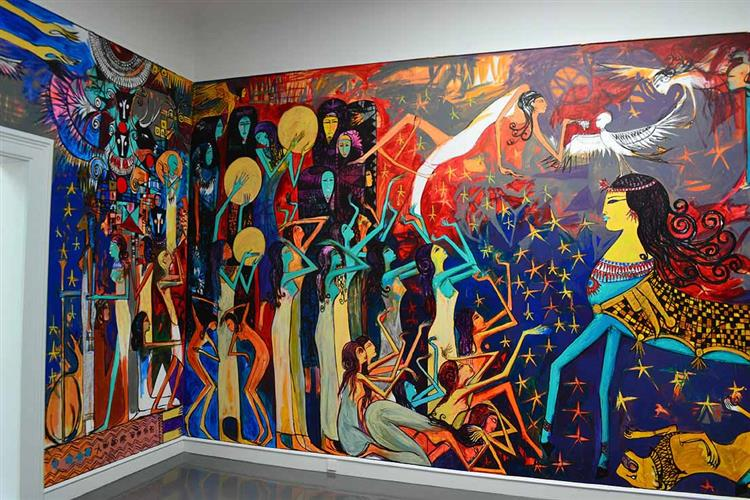

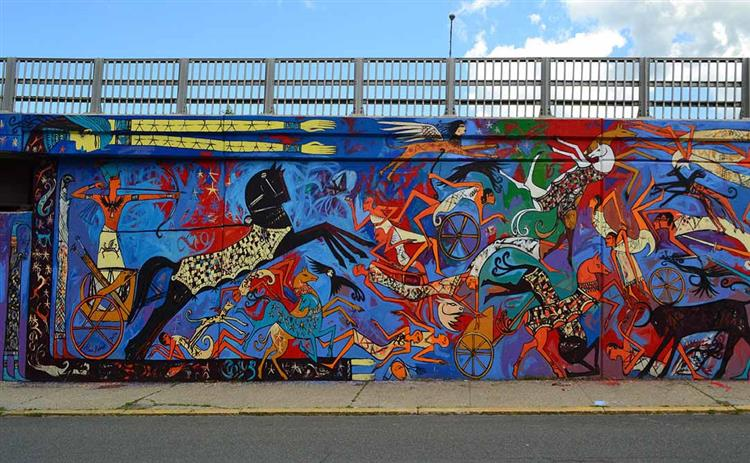

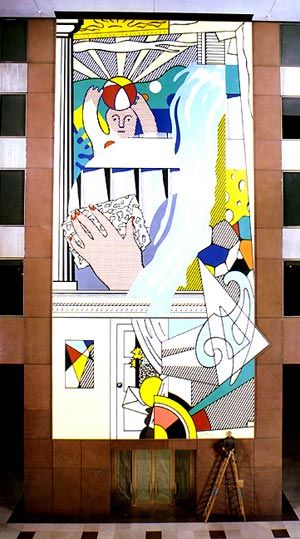

In [29]:
### rerun the cell each time to see the images
import random

genre = 'mural'

print(f"genre = {genre}")

df_test = df_cleaned_styles[df_cleaned_styles['genre_list'].apply(lambda x: genre in x if isinstance(x, list) else False)]

# Take 3 randomly
df_sample = df_test.sample(min(3, len(df_test)))

# Download and print images
for url in df_sample['img']:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    display(img)

==> Manually chosed in the CSV what genre have to be dropped : sculpture, architecture etc. To only keep paintings

In [30]:
file_path="genres_uniques_filed.csv"
genres_filtered = pd.read_csv(file_path, encoding='utf-8', sep=';')
genres_filtered

FileNotFoundError: [Errno 2] No such file or directory: 'genres_uniques_filed.csv'

In [31]:
genres_to_drop = list(genres_filtered[genres_filtered['drop']==1]['genre'])
genres_to_drop

NameError: name 'genres_filtered' is not defined

In [32]:
genres_to_drop = ['sketch and study',
 'sculpture',
 'design',
 'installation',
 'no genre',
 'photo',
 'poster',
 'caricature',
 'graffiti',
 'advertisement',
 'utensil',
 'veduta',
 'performance',
 'capriccio',
 'mural',
 'bird-and-flower painting',
 'digital',
 'architecture',
 'mobile',
 'miniature',
 'tapestry',
 'pastorale',
 'furniture',
 'calligraphy',
 'shan shui',
 'mosaic',
 'vanitas',
 'jewelry',
 'pin-up',
 'video',
 "trompe-l'œil",
 'panorama',
 'stabile',
 'augmented reality',
 'quadratura',
 'object',
 "artist's book",
 'ornament',
 'animation',
 'tronie']

In [33]:
df_filtered = df_cleaned_styles[
    df_cleaned_styles['genre_list'].apply(
        lambda x: all(genre not in genres_to_drop for genre in x) if isinstance(x, list) else True
    )
].reset_index(drop=True)
df_filtered

artist        style                    genre  \
0                    Gentile Bellini  Orientalism                 portrait   
1                    Gentile Bellini  Orientalism                 portrait   
2                    Gentile Bellini  Orientalism  portrait,genre painting   
3                   Giovanni Bellini  Orientalism                 portrait   
4               Maria Sibylla Merian   Naturalism          flower painting   
...                              ...          ...                      ...   
126372  Clifford Possum Tjapaltjarri   Native Art             tessellation   
126373  Clifford Possum Tjapaltjarri   Native Art             tessellation   
126374  Clifford Possum Tjapaltjarri   Native Art             tessellation   
126375  Clifford Possum Tjapaltjarri   Native Art             tessellation   
126376  Clifford Possum Tjapaltjarri   Native Art             tessellation   

                 movement                                               tags  \
0       Early Renaissance                    ['Turban', 'Cheek', 'Headgear']   
1       Early Renaissance                          ['Holyplaces', 'Monarch']   
2       Early Renaissance                                        ['Textile']   
3        High Renaissance  ['male-portraits', 'Skin', 'Facialhair', 'Chin...   
4                 Baroque  ['Flower', 'Plant', 'Botany', 'Textile', 'Flor...   
...                   ...                                                ...   
126372         Native Art                                                NaN   
126373         Native Art                                                NaN   
126374         Native Art                                                NaN   
126375         Native Art                                                NaN   
126376         Native Art                                                NaN   

                                                      url  \
0       https://www.wikiart.org/en/gentile-bellini/por...   
1       https://www.wikiart.org/en/gentile-bellini/por...   
2       https://www.wikiart.org/en/gentile-bellini/der...   
3       https://www.wikiart.org/en/giovanni-bellini/ma...   
4       https://www.wikiart.org/en/maria-sibylla-meria...   
...                                                   ...   
126372  https://www.wikiart.org/en/clifford-possum-tja...   
126373  https://www.wikiart.org/en/clifford-possum-tja...   
126374  https://www.wikiart.org/en/clifford-possum-tja...   
126375  https://www.wikiart.org/en/clifford-possum-tja...   
126376  https://www.wikiart.org/en/clifford-possum-tja...   

                                                      img  \
0       https://uploads6.wikiart.org/00296/images/gent...   
1       https://uploads2.wikiart.org/00290/images/gent...   
2       https://uploads2.wikiart.org/00290/images/gent...   
3       https://uploads5.wikiart.org/images/giovanni-b...   
4       https://uploads4.wikiart.org/images/maria-siby...   
...                                                   ...   
126372  https://uploads7.wikiart.org/00335/images/clif...   
126373  https://uploads8.wikiart.org/00335/images/clif...   
126374  https://uploads7.wikiart.org/00335/images/clif...   
126375  https://uploads1.wikiart.org/00335/images/clif...   
126376  https://uploads0.wikiart.org/00335/images/clif...   

                                                file_name  \
0                       3662-59c8d4c345d2a027e83cb812.jpg   
1                            3663-gentile-bellini-003.jpg   
2                            3665-gentile-bellini-009.jpg   
3                              4723-man-with-a-turban.jpg   
4       18458-from-der-raupen-wunderbare-verwandlung-u...   
...                                                   ...   
126372     253399-untitled-narripi-worm-dreaming-1996.jpg   
126373             253400-worm-dreaming-napperby-1996.jpg   
126374                      253401-worm-dreaming-1996.jpg   
126375                    253402-worm-dreaming-1996-1.jp

In [34]:
df_filtered.shape

(126377, 9)

In [35]:
df_filtered.isna().sum()

artist            0
style             0
genre             0
movement          0
tags          32854
url               0
img               0
file_name         0
genre_list        0
dtype: int64

# CODE : FUNCTIONS TO CLEAN dataframe

In [36]:
def load_wikiart_kaggle_data() :
    """load the dataframe from kaggle"""
    # Set the path to the file you'd like to load
    file_path = "wikiart_art_pieces.csv"

    # Load the latest version
    df = kagglehub.load_dataset(
      KaggleDatasetAdapter.PANDAS,
      "simolopes/wikiart-all-artpieces",
      file_path
    )

    return df

In [37]:
def filter_dataframe(df: pd.DataFrame, styles_to_keep: List[str], genres_to_drop: List[str]) -> pd.DataFrame:
    """clean the dataframe to keep categories wanted"""
    df_cleaned_styles = df[df['style'].isin(styles_to_keep)]
    df_cleaned_styles_copy = df_cleaned_styles.copy()
    df_cleaned_styles_copy['genre_list'] = df_cleaned_styles_copy['genre'].str.split(',\s*', regex=True)
    df_filtered = df_cleaned_styles_copy[df_cleaned_styles_copy['genre_list'].apply(
        lambda x: all(genre not in genres_to_drop for genre in x) if isinstance(x, list) else True
    )].set_index("file_name", drop=True)
    return df_filtered

In [38]:
styles_to_keep = ['Orientalism',
     'Neoclassicism',
     'Naturalism',
     'Romanticism',
     'Academicism',
     'Neo-Rococo',
     'Kitsch',
     'Realism',
     'Impressionism',
     'Expressionism',
     'Japonism',
     'Magic Realism',
     'Symbolism',
     'Costumbrismo',
     'Biedermeier',
     'Luminism',
     'Ink and wash painting',
     'Naïve Art (Primitivism)',
     'Art Nouveau (Modern)',
     'Divisionism',
     'Social Realism',
     'Tonalism',
     'Post-Impressionism',
     'Pointillism',
     'Ukiyo-e',
     'American Realism',
     'Socialist Realism',
     'Fauvism',
     'Cubism',
     'Abstract Art',
     'Precisionism',
     'Figurative Expressionism',
     'Existential Art',
     'Surrealism',
     'New Realism',
     'Neo-baroque',
     'Abstract Expressionism',
     'Neo-Romanticism',
     'Neo-Impressionism',
     'Cloisonnism',
     'Synthetism',
     'Regionalism',
     'Orphism',
     'Art Deco',
     'Neo-Expressionism',
     'Fantasy Art',
     'New Medievialism',
     'Neo-Byzantine',
     'Lyrical Abstraction',
     'New Ink Painting',
     'Verism',
     'Contemporary Realism',
     'Color Field Painting',
     'Art Brut',
     'Outsider art',
     'Cubo-Expressionism',
     'Pop Art',
     'Geometric',
     'Art Singulier',
     'Action painting',
     'Constructivism',
     'Neoplasticism',
     'Intimism',
     'Dada',
     'Analytical Cubism',
     'Synthetic Cubism',
     'Muralism',
     'Futurism',
     'Cubo-Futurism',
     'Tachisme',
     'Modernismo',
     'Metaphysical art',
     'Excessivism',
     'Classical Realism',
     'Severe Style',
     'Miserablism',
     'Art Informel',
     'Neo-Pop Art',
     'Native Art',
     'Transavantgarde',
     'Contemporary',
     'Conceptual Art',
     'Light and Space',
     'Junk Art',
     'Shin-hanga',
     'Hard Edge Painting',
     'Neo-Figurative Art',
     'Purism',
     'Tubism',
     'Suprematism',
     'Concretism',
     'Analytical\xa0Realism',
     'Mechanistic Cubism',
     'Neo-Suprematism',
     'Automatic Painting',
     'Op Art',
     'Minimalism',
     'Post-Minimalism',
     'Post-Painterly Abstraction',
     'Neo-Concretism',
     'Lettrism',
     'Kinetic Art',
     'New European Painting',
     'P&D (Pattern and Decoration)',
     'New Casualism',
     'Neo-Dada',
     'Spectralism',
     'Rayonism',
     'Synchromism',
     'Modernism',
     'Feminist Art',
     'Transautomatism',
     'Fantastic Realism',
     'Photorealism',
     'Hyper-Realism',
     'Nouveau Réalisme',
     'Postcolonial art',
     'Sots Art',
     'Indian Space painting',
     'Zen',
     'Spatialism',
     'Cartographic Art',
     'Superflat',
     'Mail Art',
     'Neo-Minimalism',
     'Fiber art',
     'Street art',
     'Neo-Geo',
     'Maximalism',
     'Queer art',
     'Digital Art',
     'Cyber Art',
     'Poster Art Realism',
     'Hyper-Mannerism (Anachronism)',
     'Confessional Art',
     'Neo-Orthodoxism',
     'Graffiti Art',
     'Lowbrow Art',
     'Stuckism']

In [39]:
genres_to_drop = ['sketch and study',
 'sculpture',
 'design',
 'installation',
 'no genre',
 'photo',
 'poster',
 'caricature',
 'graffiti',
 'advertisement',
 'utensil',
 'veduta',
 'performance',
 'capriccio',
 'mural',
 'bird-and-flower painting',
 'digital',
 'architecture',
 'mobile',
 'miniature',
 'tapestry',
 'pastorale',
 'furniture',
 'calligraphy',
 'shan shui',
 'mosaic',
 'vanitas',
 'jewelry',
 'pin-up',
 'video',
 "trompe-l'œil",
 'panorama',
 'stabile',
 'augmented reality',
 'quadratura',
 'object',
 "artist's book",
 'ornament',
 'animation',
 'tronie']

In [40]:
df = load_wikiart_kaggle_data()
df_filtered = filter_dataframe(df=df, styles_to_keep=styles_to_keep, genres_to_drop=genres_to_drop)

/var/folders/1r/626773hx3mbf2w_31tdjwv6m0000gn/T/ipykernel_70355/3542310891.py:7: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [41]:
df_filtered.head()

artist  \
file_name                                                                  
3662-59c8d4c345d2a027e83cb812.jpg                        Gentile Bellini   
3663-gentile-bellini-003.jpg                             Gentile Bellini   
3665-gentile-bellini-009.jpg                             Gentile Bellini   
4723-man-with-a-turban.jpg                              Giovanni Bellini   
18458-from-der-raupen-wunderbare-verwandlung-un...  Maria Sibylla Merian   

                                                          style  \
file_name                                                         
3662-59c8d4c345d2a027e83cb812.jpg                   Orientalism   
3663-gentile-bellini-003.jpg                        Orientalism   
3665-gentile-bellini-009.jpg                        Orientalism   
4723-man-with-a-turban.jpg                          Orientalism   
18458-from-der-raupen-wunderbare-verwandlung-un...   Naturalism   

                                                                      genre  \
file_name                                                                     
3662-59c8d4c345d2a027e83cb812.jpg                                  portrait   
3663-gentile-bellini-003.jpg                                       portrait   
3665-gentile-bellini-009.jpg                        portrait,genre painting   
4723-man-with-a-turban.jpg                                         portrait   
18458-from-der-raupen-wunderbare-verwandlung-un...          flower painting   

                                                             movement  \
file_name                                                               
3662-59c8d4c345d2a027e83cb812.jpg                   Early Renaissance   
3663-gentile-bellini-003.jpg                        Early Renaissance   
3665-gentile-bellini-009.jpg                        Early Renaissance   
4723-man-with-a-turban.jpg                           High Renaissance   
18458-from-der-raupen-wunderbare-verwandlung-un...            Baroque   

                                                                                                 tags  \
file_name                                                                                               
3662-59c8d4c345d2a027e83cb812.jpg                                     ['Turban', 'Cheek', 'Headgear']   
3663-gentile-bellini-003.jpg                                                ['Holyplaces', 'Monarch']   
3665-gentile-bellini-009.jpg                                                              ['Textile']   
4723-man-with-a-turban.jpg                          ['male-portraits', 'Skin', 'Facialhair', 'Chin...   
18458-from-der-raupen-wunderbare-verwandlung-un...  ['Flower', 'Plant', 'Botany', 'Textile', 'Flor...   

                                                                                                  url  \
file_name                                                                                               
3662-59c8d4c345d2a027e83cb812.jpg                   https://www.wikiart.org/en/gentile-bellini/por...   
3663-gentile-bellini-003.jpg                        https://www.wikiart.org/en/gentile-bellini/por...   
3665-gentile-bellini-009.jpg                        https://www.wikiart.org/en/gentile-bellini/der...   
4723-man-with-a-turban.jpg                          https://www.wikiart.org/en/giovanni-bellini/ma...   
18458-from-der-raupen-wunderbare-verwandlung-un...  https://www.wikiart.org/en/maria-sibylla-meria...   

                                                                                                  img  \
file_name                                                                                               
3662-59c8d4c345d2a027e83cb812.jpg                   https://uploads6.wikiart.org/00296/images/gent...   
3663-gentile-bellini-003.jpg                        https://uploads2.wikiart.org/00290/images/gent...   
3665-gentile-bellini-009.jpg                        https://uploads2.wikiart.org/00290/images/gent...   


In [42]:
df_filtered.shape

(126377, 8)

In [43]:
file_path="/Users/shogun/code/gwen-m97/raw_data/data_sampling200_topstyles.csv"
small_training_sample = pd.read_csv(file_path)
small_training_sample.head()

artist               style            movement  \
0  Eleanor Fortescue-Brickdale         Romanticism         Romanticism   
1         Pierre-Paul Prud'hon         Romanticism       Neoclassicism   
2             Sorin Dumitrescu          Surrealism     Neo-Orthodoxism   
3               Edouard Cortes  Post-Impressionism  Post-Impressionism   
4             Eugene Delacroix         Romanticism         Romanticism   

                                                tags  \
0                          ['Middleages', 'Prophet']   
1   ['female-portraits', 'mother-and-child', 'Lady']   
2                                          ['Table']   
3  ['streets-and-squares', 'houses-and-buildings'...   
4  ['famous-people', 'Louis-de-Bourbon', 'Bishop-...   

                                                 url  \
0  https://www.wikiart.org/en/eleanor-fortescue-b...   
1  https://www.wikiart.org/en/pierre-paul-prud-ho...   
2  https://www.wikiart.org/en/sorin-dumitrescu/il...   
3  https://www.wikiart.org/en/edouard-cortes/tuil...   
4  https://www.wikiart.org/en/eugene-delacroix/th...   

                                                 img  \
0  https://uploads0.wikiart.org/00289/images/elea...   
1  https://uploads8.wikiart.org/images/pierre-pau...   
2  https://uploads7.wikiart.org/images/sorin-dumi...   
3  https://uploads4.wikiart.org/images/edouard-co...   
4  https://uploads0.wikiart.org/images/eugene-del...   

                                           file_name            genre_list  \
0  52663-efb-1910-p127-elizabeth-prayed-to-god-to...      ['illustration']   
1                                 31660-untitled.jpg          ['portrait']   
2  243190-illustration-for-nichita-stanescu-s-kno...      ['illustration']   
3                      124633-tuileries-garden-1.jpg         ['cityscape']   
4  39529-the-assassination-of-the-bishop-of-liege...  ['history painting']   

                                             Artwork             Date  
0                                                NaN              NaN  
1                                           Untitled  XVIII-XIX cent.  
2  Illustration for Nichita Stanescu's Knots and ...             1982  
3                                                NaN              NaN  
4                                                NaN              NaN

In [44]:
for row in small_training_sample.itertuples():
    print(row[2], row[5])
    url = row[6]

# Télécharger l'image
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    file_name = row[6].split('/images/')[1].replace('/','_')

    print(file_name)

    dst = f"/Users/shogun/code/gwen-m97/raw_data/gwen_200/{file_name}"
    img.save(dst)


Romanticism https://www.wikiart.org/en/eleanor-fortescue-brickdale/elizabeth-prayed-to-god-to-clothe-her-1910
eleanor-fortescue-brickdale_efb-1910-p127-elizabeth-prayed-to-god-to-clothe-her.jpg!Large.jpg
Romanticism https://www.wikiart.org/en/pierre-paul-prud-hon/untitled
pierre-paul-prud-hon_untitled.jpg
Surrealism https://www.wikiart.org/en/sorin-dumitrescu/illustration-for-nichita-stanescu-s-knots-and-signs-1982
sorin-dumitrescu_illustration-for-nichita-stanescu-s-knots-and-signs-1982.jpg
Post-Impressionism https://www.wikiart.org/en/edouard-cortes/tuileries-garden-1
edouard-cortes_tuileries-garden-1.jpg!Large.jpg
Romanticism https://www.wikiart.org/en/eugene-delacroix/the-assassination-of-the-bishop-of-liege-1829
eugene-delacroix_the-assassination-of-the-bishop-of-liege-1829(1).jpg!Large.jpg
Impressionism https://www.wikiart.org/en/claude-monet/regatta-at-argenteuil
claude-monet_regatta-at-argenteuil.jpg!Large.jpg
Realism https://www.wikiart.org/en/frank-w-benson/lida-shaw-king-186